In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import xml.etree.ElementTree as ET
import os
from os import listdir
import pandas as pd
from sklearn.model_selection import train_test_split
import time

In [2]:
def annotated_image(name, show): 
    image_path = f"signature_data/images/{name}.jpg"
    xml_path = f"signature_data/annotations/{name}.xml"
    
    image = Image.open(image_path)
    original_width, original_height = image.size
    
    tree = ET.parse(xml_path)
    root = tree.getroot()
    fig, ax = plt.subplots(1, figsize=(15, 15))
    ax.imshow(image)

    boxes = [] #extracted bounding boxes
    for obj in root.findall(".//object"):
        xmin = int(obj.find(".//bndbox/xmin").text)
        xmax = int(obj.find(".//bndbox/xmax").text)
        ymin = int(obj.find(".//bndbox/ymin").text)
        ymax = int(obj.find(".//bndbox/ymax").text)

        boxes.append([xmin,xmax,ymin,ymax])
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=.75, edgecolor='r', facecolor='none')
        
        ax.add_patch(rect)
    if show == 1:
        plt.show() #there for line below, uncomment to see result
        print(original_width, original_height)
    plt.close(fig) #adding will allow image to close after viewing
    return boxes


#plt.show()

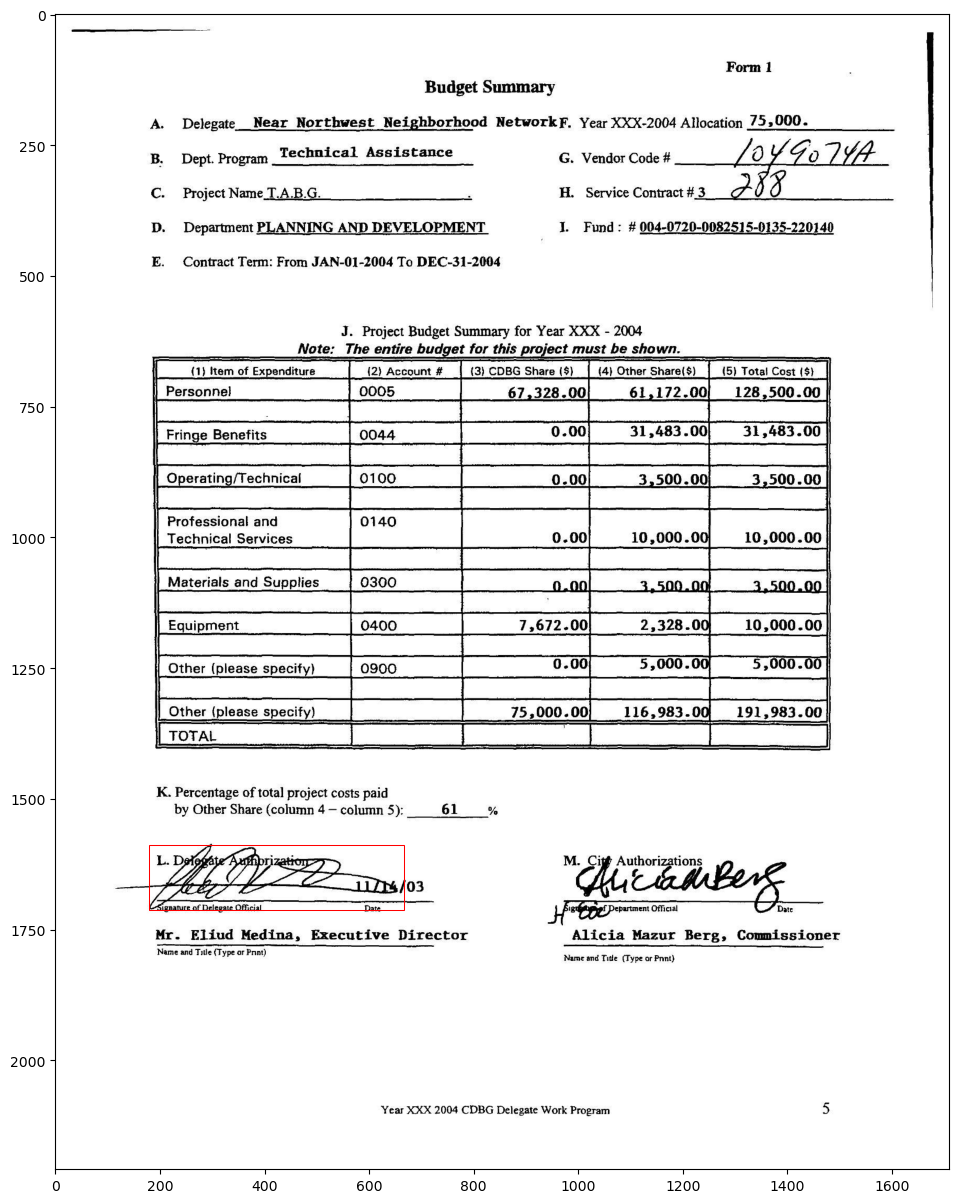

1709 2209


[[178, 667, 1589, 1713]]

In [42]:
annotated_image("chicago_109.pdf_33", 1)

In [4]:
folder_dir = "signature_data/"
image_names = []
b_boxes = {}

In [5]:
for filename in os.listdir(os.path.join(folder_dir, 'images')): #in case of using a different directory. 
    if filename.endswith('.jpg'):
        image_name, _ = os.path.splitext(filename)  # Removes .jpg
        image_names.append(image_name)
        

In [6]:
image_names[:10]   #stores names

['chicago_108.pdf_2',
 'chicago_108.pdf_4',
 'chicago_109.pdf_2',
 'chicago_109.pdf_33',
 'chicago_109.pdf_41',
 'chicago_109.pdf_46',
 'chicago_109.pdf_48',
 'chicago_109.pdf_49',
 'chicago_109.pdf_50',
 'chicago_118.pdf_2']

### Plan
- first create a dictionary of bounding boxes (all of them in all images)
- iterate through image_names --> find the bounding boxes using the annotated image function
- store it in b_boxes, where each row will contain a bounding box to some image

**Line below will take a (7-10min)

In [7]:
start = time.time()
for name in image_names:  #append those anntated bounding boxes into the images 
    b_boxes[name] = annotated_image(name, 0)
end = time.time()

total_time = end - start
total_time

181.77765560150146

"""
 if you wanted to normalize image pixels
    path = os.path.join(folder_dir, 'images', f"{name}.jpg")
    image = Image.open(path)
    width, height = image.size

    n_bboxes = []
    for box in get_boxes:
        xmin, xmax, ymin, ymax = box
        n_bbox = [
            xmin / width,
            xmax / width,
            ymin / height,
            ymax / height
        ]
        n_bboxes.append(n_bbox)
    b_boxes[name] = n_bboxes
"""

## Options of DataFrame

** Keeping both dataframes, weighing options when training/testing

- Df1 --> matrix of bounding boxes, with its respective image location coordinates
- Df --> Each row represents a singular bounding box and its coordinates, with its respective image location 

#### Option 1

In [8]:
df1 = pd.DataFrame(
    {
        'image_name': list(b_boxes.keys()),
        'bbox_coordinates': list(b_boxes.values())
    }
)
df1['total_bboxes'] = df1['bbox_coordinates'].apply(len) #used when iterating through cleaning/modeling


#### Option 2

In [9]:
image_data = []
for name, boxes in b_boxes.items():
    image_data.extend(
        {'image_name': name, 'xmin': box[0], 'xmax': box[1], 'ymin': box[2], 'ymax': box[3]}
        for box in boxes
    )


In [10]:
df = pd.DataFrame(image_data)

## Note
stores image name and coordinates of bounding boxes, helps with image coordination.

<bold> ex) chicago_108.pdf_2  <bold>
- has around 6 bounding boxes, stores that coordinates pertaining to those
- treating each bounding box as it's individual row. 
*** can talk with team regarding storing it 

In [12]:
df.head(20)  

,image_name,xmin,xmax,ymin,ymax
0,chicago_108.pdf_2,160,507,1363,1465
1,chicago_108.pdf_2,943,1443,1659,1758
2,chicago_108.pdf_2,105,697,1754,1893
3,chicago_108.pdf_2,845,1490,1766,1930
4,chicago_108.pdf_2,195,760,1841,2045
5,chicago_108.pdf_2,981,1506,1869,2050
6,chicago_108.pdf_4,353,681,935,1174
7,chicago_108.pdf_4,122,872,1542,1677
8,chicago_109.pdf_2,1254,1420,143,210
9,chicago_109.pdf_33,178,667,1589,1713


### Note

- Instead of each bounding box with its own row, it is stored as a matrix of coordinates
- Still in same order (xmin,ymin,xmax,ymax) format

In [13]:
df1.head(20)

,image_name,bbox_coordinates,total_bboxes
0,chicago_108.pdf_2,"[[160, 507, 1363, 1465], [943, 1443, 1659, 175...",6
1,chicago_108.pdf_4,"[[353, 681, 935, 1174], [122, 872, 1542, 1677]]",2
2,chicago_109.pdf_2,"[[1254, 1420, 143, 210]]",1
3,chicago_109.pdf_33,"[[178, 667, 1589, 1713]]",1
4,chicago_109.pdf_41,"[[634, 719, 1642, 1673]]",1
5,chicago_109.pdf_46,"[[1086, 1468, 1996, 2091]]",1
6,chicago_109.pdf_48,"[[784, 1285, 1107, 1254], [794, 1358, 1598, 18...",2
7,chicago_109.pdf_49,"[[931, 1363, 1961, 2151]]",1
8,chicago_109.pdf_50,"[[876, 1294, 753, 870], [743, 1444, 888, 1019]...",4
9,chicago_118.pdf_2,"[[231, 408, 1074, 1105]]",1


In [14]:
df["image_name"].size   #including the bounding boxes

3328

In [15]:
df["image_name"].nunique()  #total size of image dataset

2058

In [16]:
df1["image_name"].size #same as nunique

2058

In [17]:
df.shape

(3328, 5)

In [18]:
df1.shape

(2058, 3)

## Visualizing bounding boxes
- ensuring that the dataframe is correctly capturing features

In [23]:
def visualize_image(image_name):
    path = os.path.join(folder_dir, 'images', f"{image_name}.jpg")
    image = Image.open(path)
    #original_width, original_height = image.size   --> for normalization
    
    
    fig, ax = plt.subplots(1, figsize=(15, 15))
    ax.imshow(image)
    
    
    img_df = df[df['image_name'] == image_name]
    
    for _, row in img_df.iterrows():
        # Denormalize bounding boxes --> optional!!
        xmin = row['xmin'] #* original_width
        xmax = row['xmax'] #* original_width
        ymin = row['ymin'] #* original_height
        ymax = row['ymax'] #* original_height
        print(xmin,xmax,ymin,ymax)
        
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=.75, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
       
    #print(original_width, original_height)
    plt.show()

160 507 1363 1465
943 1443 1659 1758
105 697 1754 1893
845 1490 1766 1930
195 760 1841 2045
981 1506 1869 2050


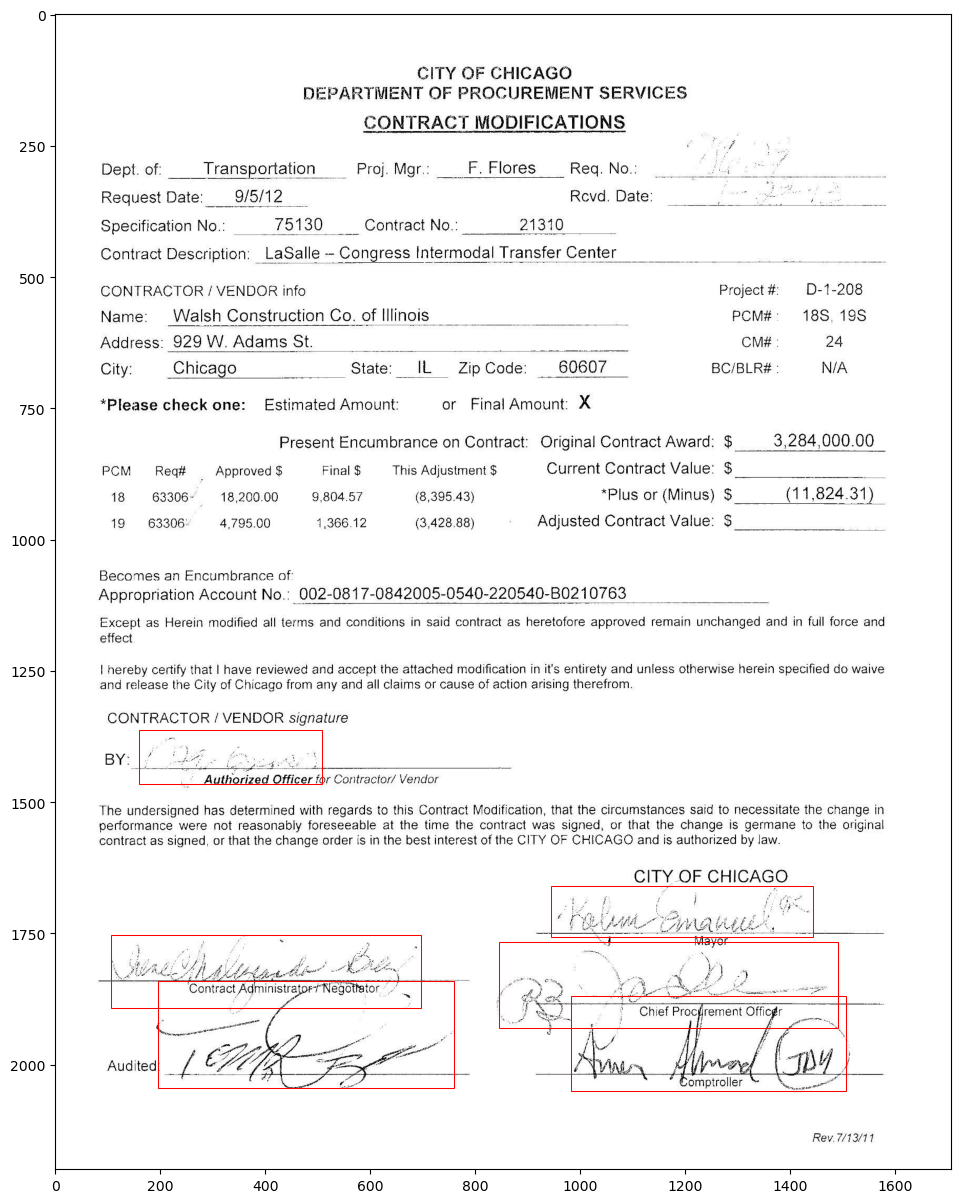

In [24]:
visualize_image("chicago_108.pdf_2")

### Note
- splitting both test and train, then clean data. 
- provided the test data with bounding boxes, so when using those images without it, then compare
- Image Size: Resizing images/ensure consistently resize the images and their corresponding bounding boxes.

In [19]:
X_train, X_test = train_test_split(df, test_size=0.4, random_state = 1234)   #need to discuss with team about right paramters

In [20]:
X_train1, X_test1 = train_test_split(df1, test_size=0.4, random_state = 1234) # just there if we choose

In [21]:
import cv2

### Notes
- find the ratio of current image to current bounding box size, to proportional 224
- resize each image, then perform this 
- so      xmin * image.width / 224 = new xmin      similar for xmax    AND  ymin, and ymax
** check with team if this is their target size

In [22]:
resized = (800, 600)  # Desired target size??
new_boxes = [] #storing the new boxes that are scaled from the resized image
image_resized = {}  # Dictionary to store scaling factors for each image

### Note

*** Optional ***  to run line below, just used to understand area distribution across all image data for image resizing

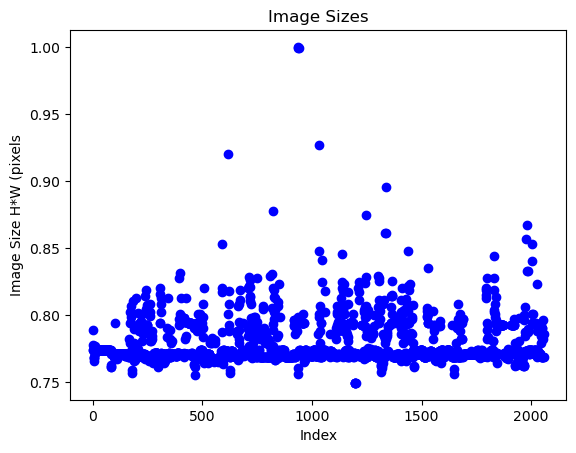

In [26]:
import matplotlib.image as mpimg

# Load the image
image_sizes = []
image_names = df1['image_name'].unique()


for image_name in image_names:
    path = os.path.join(folder_dir, 'images', f"{image_name}.jpg")
    image = mpimg.imread(path)

    
    height, width, = image.shape[:2]
    image_sizes.append(height*width)

max_image_size = max(image_sizes)

# Normalize image sizes (so that max size is 1)
normalized_sizes = [size / max_image_size for size in image_sizes]

# Plot normalized image sizes
plt.scatter(range(len(image_names)), normalized_sizes, color='blue')

plt.xlabel("Index")
plt.ylabel("Image Size H*W (pixels")
plt.title("Image Sizes")
plt.show()

In [25]:
for name in image_names:
    image = cv2.imread(os.path.join(folder_dir, 'images', f"{name}.jpg"))   #read image path
    
    og_height, og_width = image.shape[:2]
    image = cv2.resize(image, resized)
    height, width = image.shape[:2]
    

    w_scaled = round(width / og_width, 4)
    h_scaled = round(height / og_height, 4)

    
    image_resized[name] = {
        'w_scaled': w_scaled,   
        'h_scaled': h_scaled    
    }

In [26]:
df.head(10) #just for comparing it to the new resized images

,image_name,xmin,xmax,ymin,ymax
0,chicago_108.pdf_2,160,507,1363,1465
1,chicago_108.pdf_2,943,1443,1659,1758
2,chicago_108.pdf_2,105,697,1754,1893
3,chicago_108.pdf_2,845,1490,1766,1930
4,chicago_108.pdf_2,195,760,1841,2045
5,chicago_108.pdf_2,981,1506,1869,2050
6,chicago_108.pdf_4,353,681,935,1174
7,chicago_108.pdf_4,122,872,1542,1677
8,chicago_109.pdf_2,1254,1420,143,210
9,chicago_109.pdf_33,178,667,1589,1713


In [27]:
first_key = list(image_resized.keys())[2]

# Access w_scaled and h_scaled for the first image
first_w_scaled = image_resized[first_key]['w_scaled']
first_h_scaled = image_resized[first_key]['h_scaled']
first_w_scaled, first_h_scaled

(0.4638, 0.2703)

In [28]:
for idx, row in df.iterrows():
    image_name = row['image_name']
    
    # Check if the image has been resized (and the scaling factors are available)
    if image_name in image_resized:
        w_scaled = image_resized[image_name]['w_scaled']
        h_scaled = image_resized[image_name]['h_scaled']

        # Scale bounding box coordinates for the current row
        df.at[idx, 'xmin'] = int(row['xmin'] * w_scaled)
        df.at[idx, 'xmax'] = int(row['xmax'] * w_scaled)
        df.at[idx, 'ymin'] = int(row['ymin'] * h_scaled)
        df.at[idx, 'ymax'] = int(row['ymax'] * h_scaled)
    else:
        print(f"Scaling factors not found for {image_name}")



In [29]:
df.head(10)

,image_name,xmin,xmax,ymin,ymax
0,chicago_108.pdf_2,74,237,371,399
1,chicago_108.pdf_2,441,676,452,479
2,chicago_108.pdf_2,49,326,478,516
3,chicago_108.pdf_2,396,698,481,526
4,chicago_108.pdf_2,91,356,502,557
5,chicago_108.pdf_2,459,705,509,559
6,chicago_108.pdf_4,165,319,254,320
7,chicago_108.pdf_4,57,408,420,457
8,chicago_109.pdf_2,581,658,38,56
9,chicago_109.pdf_33,83,312,431,465


In [38]:
#made resized = (600,400)
def display_image_with_boxes(image_name):

    path = os.path.join(folder_dir, 'images', f"{image_name}.jpg")
    get_image = Image.open(path)

    
    image = get_image.resize(resized)
    fig, ax = plt.subplots(1)
    plt.imshow(image)

    img_df = df[df['image_name'] == image_name]
    
    for _, row in img_df.iterrows():
        # Denormalize bounding boxes --> optional!!
        xmin = row['xmin'] #* original_width
        xmax = row['xmax'] #* original_width
        ymin = row['ymin'] #* original_height
        ymax = row['ymax'] #* original_height
        print("b_boxcoordinates: " ,xmin,xmax,ymin,ymax)
        
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=.75, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    
   
    plt.axis('off')
    plt.show()

b_boxcoordinates:  83 312 431 465


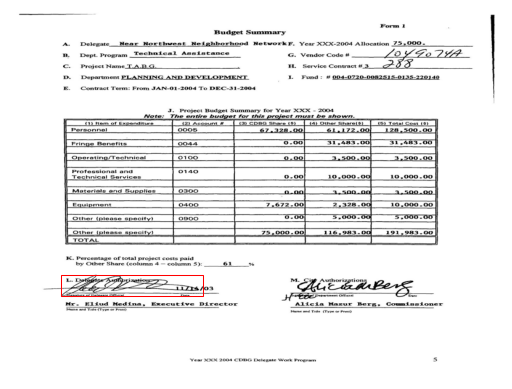

In [41]:
display_image_with_boxes("chicago_109.pdf_33")

#### References for Filtering Methods
- <a href="https://docs.opencv.org/4.5.4/d7/d4d/tutorial_py_thresholding.html">Otsu's Binarization</a>
- <a href=""></a>
